<a href="https://colab.research.google.com/github/TanviMadyalkar/UNP-Project/blob/main/Group_1(Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Strength Prediction

Description : Predict concrete comprehensive strength. Problem has 8 input variables and one output variable.

Objective : Predict concrete comprehensive strength.

Link for the dataset : https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


In [ ]:
# Importing Python libraries for the project

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression # in case of regression problem
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score,mean_squared_error,r2_score,mean_squared_error

**Uploading the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.csv to Concrete_Data.csv


**Reading CSV file**

In [ ]:
# Saving the file as a Pandas DataFrame with variable df
df = pd.read_csv('/content/Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Step 1 : Data Preprocessing

In [ ]:
# For getting the shape of the DataFrame
df.shape

(1030, 9)

In [ ]:
# Display information about the DataFrame(for NaN values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# Check for missing values in the DataFrame
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
# For better looking columns

df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                     'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
                     'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                     'Water  (component 4)(kg in a m^3 mixture)':'Water',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                     'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
                     'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
                     'Concrete compressive strength(MPa, megapascals)':'Concrete compressive strength'},inplace=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
# list of columns with null values

missing_values_columns = [col for col in df.columns if df.isnull().sum()[col] > 0]
missing_values_columns

[]

As we can see that our Data is clean(i.e, without any NaN value)
Soo we move to the next step...which is Exploratory Data Analysis (EDA)

# Step 2 : Exploratory Data Analysis (EDA)

In [ ]:
# For gaining some Statistical information about the data
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: xlabel='Age (day)', ylabel='Concrete compressive strength'>

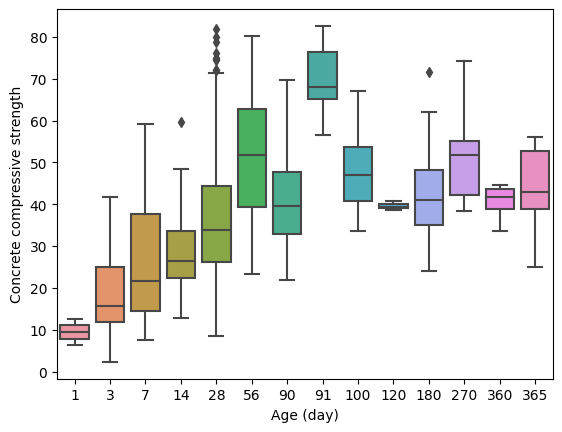

In [ ]:
sns.boxplot(x=df["Age (day)"], y=df["Concrete compressive strength"])

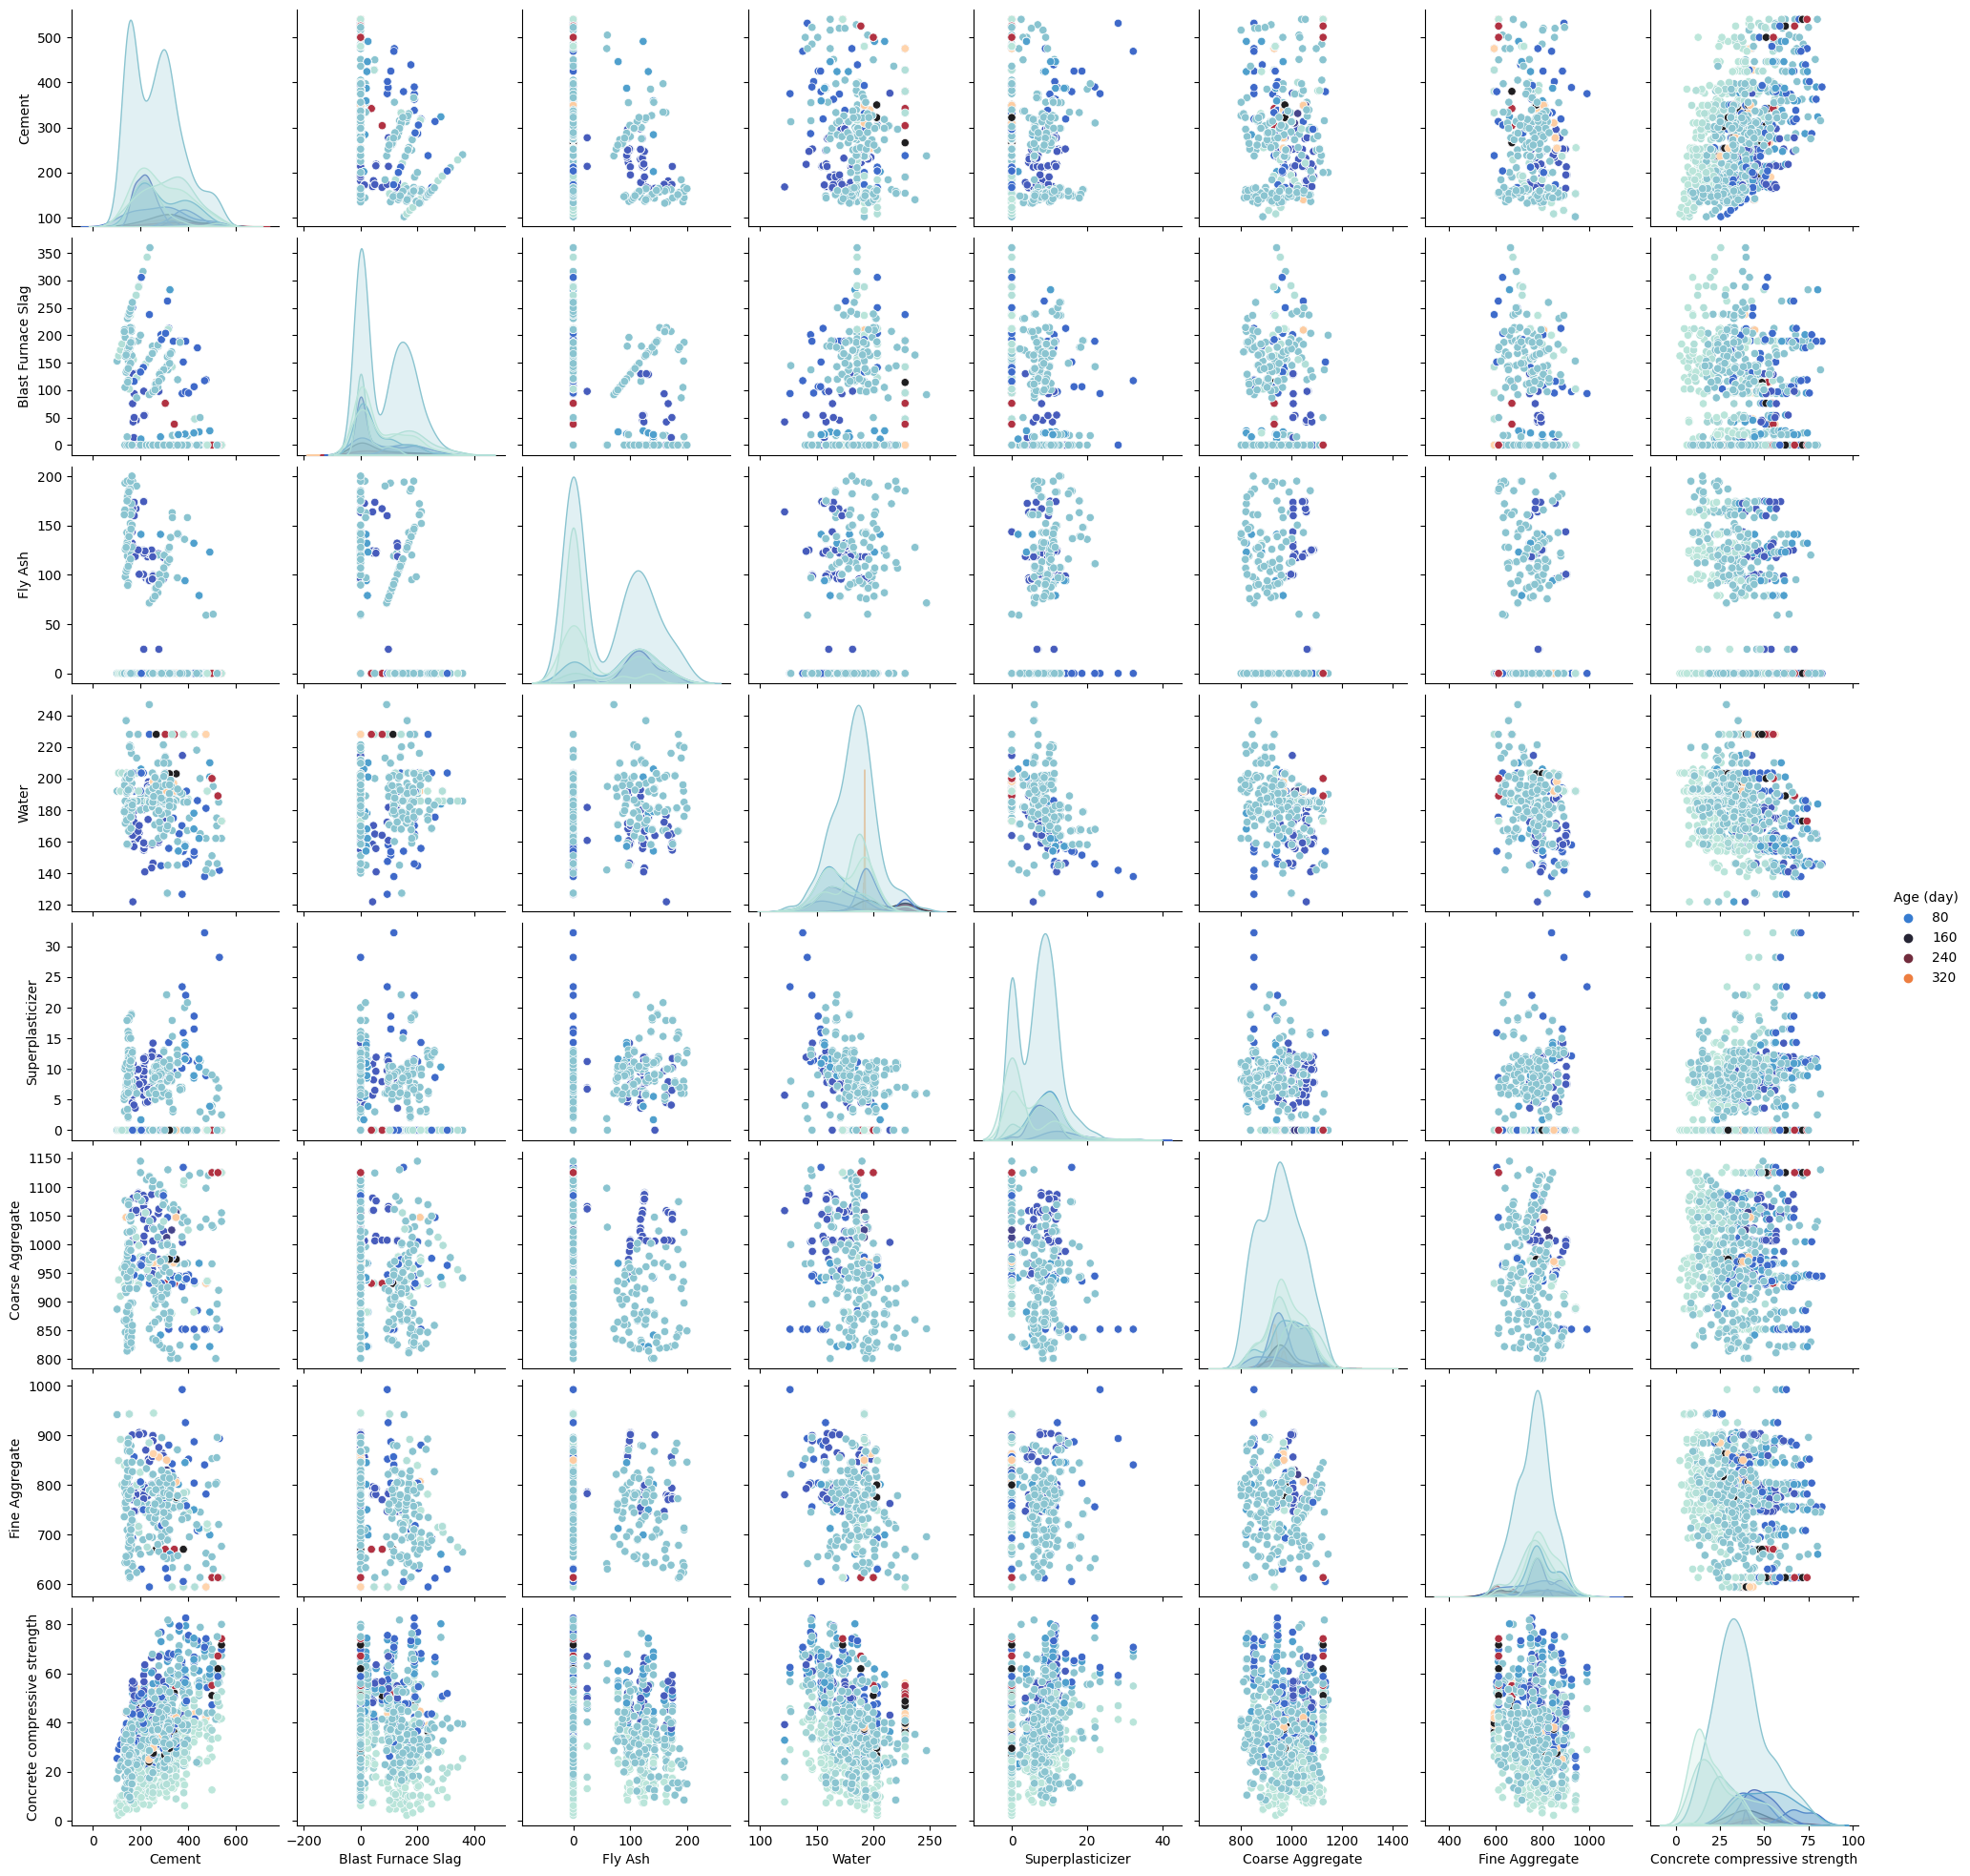

In [ ]:
sns.pairplot(df,hue='Age (day)',palette = 'icefire')

<Axes: >

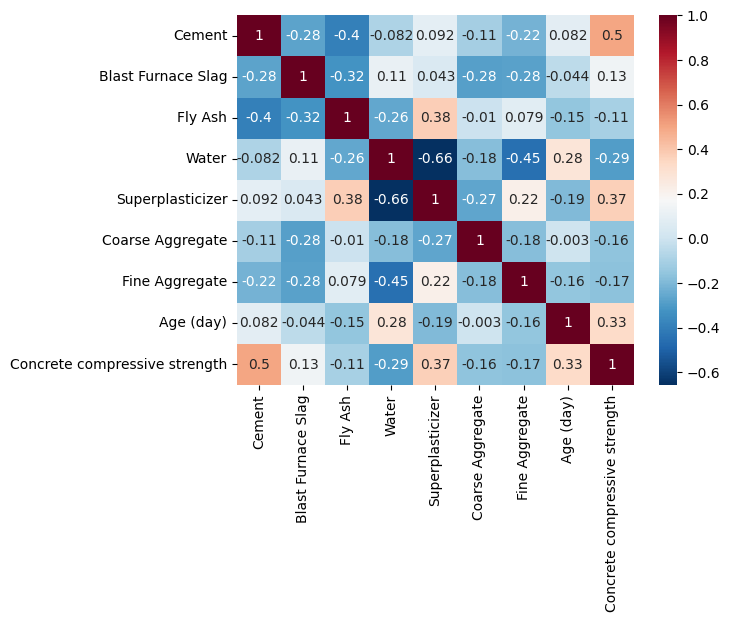

In [ ]:
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)

<Axes: xlabel='Blast Furnace Slag', ylabel='Concrete compressive strength'>

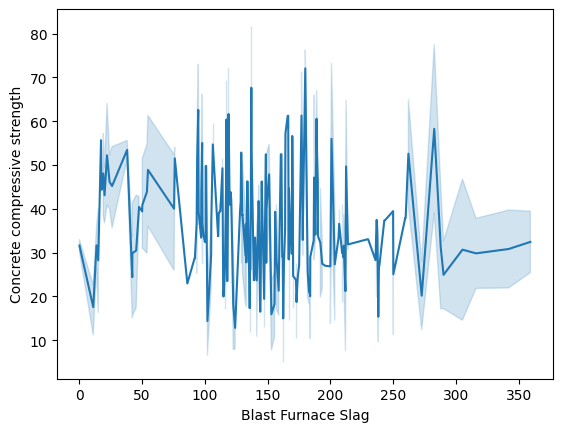

In [ ]:
sns.lineplot(x=df["Blast Furnace Slag"], y=df["Concrete compressive strength"])

<Axes: xlabel='Age (day)', ylabel='Blast Furnace Slag'>

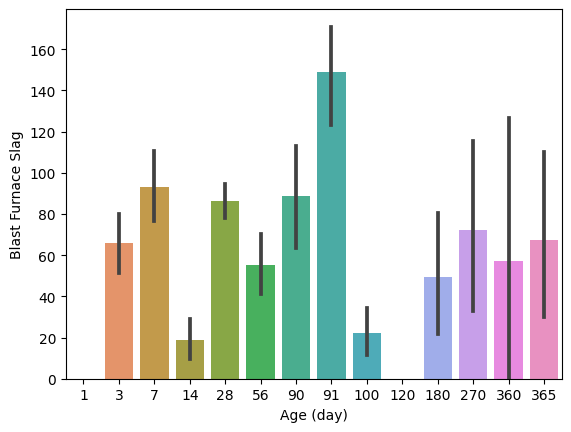

In [ ]:
sns.barplot(x=df['Age (day)'], y=df['Blast Furnace Slag'])

<Axes: xlabel='Water', ylabel='Superplasticizer'>

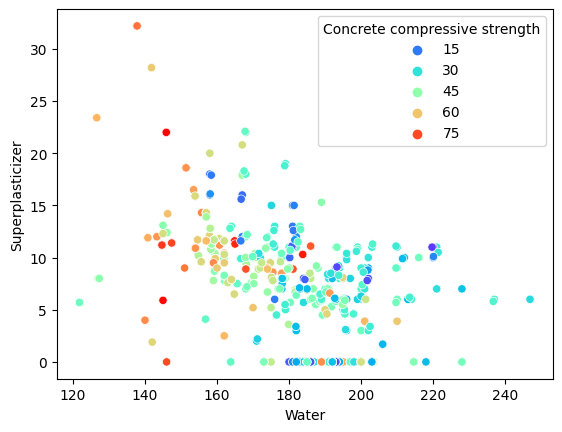

In [ ]:
sns.scatterplot(x='Water', y='Superplasticizer',hue='Concrete compressive strength',data=df, palette = 'rainbow')

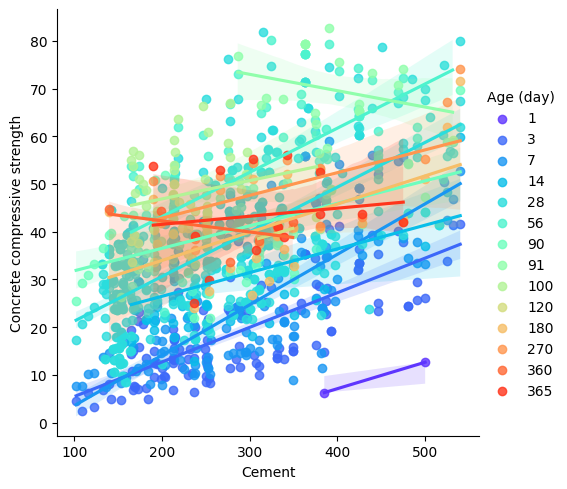

In [ ]:
sns.lmplot(x ='Cement', y ='Concrete compressive strength', hue='Age (day)', data=df, palette = 'rainbow', height = 5)

Linear Regression

In [ ]:
X=df.drop(['Concrete compressive strength'],axis=1)
y=df['Concrete compressive strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn import datasets, linear_model #importing Linear regression from sklearn
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

Coefficients: 
 [ 0.11649811  0.10116013  0.08303378 -0.16024968  0.30495708  0.01603929
  0.01442925  0.10662437]
Mean squared error: 97.96
Coefficient of determination: 0.64
7.9940555896475765


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 98.12
Coefficient of determination: 0.64
7.9100408151230575


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 99.88
Coefficient of determination: 0.63
7.975744134122686


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 98.72
Coefficient of determination: 0.63
7.948504217555842


Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[55.55       12.84       46.88166667 34.36588235 15.9475     38.
 48.79       46.88166667 34.36588235 11.263125   30.14       13.46
 26.57333333 49.36       25.64111111 23.79       38.8365     33.49
 36.84        9.055      37.2525     10.09       31.81       65.91
 33.83       23.92142857 37.42666667 48.69083333 15.605      48.69083333
 14.7        34.87416667 23.30307692  7.4        36.824      41.73333333
 53.17166667 38.02       66.1        37.2525     29.97142857 28.45
 25.64111111 69.53       16.5        66.82       23.08       32.44571429
 46.68       40.06       19.29285714 13.2        33.56       25.64111111
 35.3        38.8365     11.263125   19.2        53.59       14.7
 41.305      29.75        7.4        18.21333333 32.321      61.045
 11.505      29.75       38.8365     41.87       22.44       13.29
 37.2525     19.29285714 43.38       37.2525     57.22       35.01
 55.25       53.17166667 23.85       23.30307692 40.87       62.67666667
  9.74       59.89       27.42    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[55.55       12.06714286 47.46       39.07375    21.91       38.
 48.79       42.41666667 33.71117647 18.         42.42       17.95
 24.85       43.5        25.52666667 22.955      40.8325     33.49
 35.75        9.166      38.83375    13.66       29.84       65.91
 50.53       29.84       31.35       40.98666667 14.5        44.73592593
 14.7        31.685      22.955       7.4        35.21       44.73592593
 60.32       38.02       66.1        45.37       24.85       32.035
 32.255      70.64       27.23       66.82       23.08       33.088
 46.68       18.75       19.80818182 13.29       34.50181818 25.52666667
 35.3        38.83375    13.71       19.2        53.02       14.7
 39.9925     24.98666667  7.32       19.80818182 32.035      61.045
  9.87       24.98666667 38.51666667 41.69       22.44       13.29
 36.2075      9.166      43.38       38.83375    58.28166667 37.43
 55.25       58.21666667 37.43       25.928      40.87       66.94857143
  9.74       59.89       31.03       3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[55.55       23.60888889 49.094      34.13       21.91       47.71
 40.8325     44.3        34.13       18.         42.42       17.95
 25.34571429 44.19142857 26.406      22.955      40.8325     33.21
 35.75        9.40875    29.45       10.79       12.37       65.91
 45.43       18.31818182 35.743      37.26454545  9.01       45.43
 14.7        34.7        22.955      15.44       38.46       41.49
 60.32       40.29       66.1        43.39       25.34571429 35.743
 44.87       71.62       23.1        66.82       33.95       33.088
 50.587      40.06       23.60888889 13.2        34.7        21.75
 36.3        40.14666667 10.34       19.2        53.0825     14.7
 40.47       28.292      13.54       30.28       35.743      61.045
 11.65       28.292      38.51666667 41.84       22.44       13.2
 36.82111111  9.40875    43.38       34.7        57.22       35.743
 55.25       53.0825     37.43       25.928      40.775      66.94857143
  9.74       59.89       22.955      35.743      28.29

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[61.86       24.64333333 49.094      33.625      23.8        38.
 39.443      42.41666667 33.625      18.         33.21       17.95
 24.825      44.465      26.18636364 22.842      39.443      29.55
 34.77        9.81       36.97        7.72       16.315      65.91
 33.42       20.15222222 36.16222222 40.17181818 15.58       43.65
 14.7        28.71       36.44       12.55       38.46       41.49
 60.32       33.21       66.1        43.39       24.825      36.16222222
 44.87       70.86666667 27.23       66.82       37.915      33.305
 46.68       40.53666667 24.64333333 12.18       34.82923077 26.18636364
 29.         44.21       14.65       19.2        53.31       14.7
 40.47       24.115      12.55       24.64333333 36.16222222 64.08166667
 14.085      24.115      39.443      41.84       22.44       13.2
 36.82111111 20.73       44.21       34.82923077 57.22       36.16222222
 57.03       53.31       37.43       25.8725     40.53666667 70.86666667
  9.74       59.89       22.842    

Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print(mean_absolute_error(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))

[54.8227     20.0443     44.5135     34.7291     16.6288     38.0997
 44.7249     41.813      31.2846     14.5484     31.1356     16.9206
 29.5643     43.3948     26.9643     24.3335     40.4834     33.2742
 36.16423333 11.7422     37.9696      9.1568     26.8772     59.4464
 43.879      22.895      35.17       40.1903     14.7041     43.6117
 21.985      31.3714     27.1158     12.8755     40.62573333 42.4022
 56.68905    40.41543333 64.7502     41.6304     28.4749     31.6217
 33.1204     70.4919     27.159      63.1037     33.0551     31.548
 52.02189167 37.3849     21.8583     17.2976     37.1308     26.0345
 33.7157     40.8662     12.9477     20.1571     51.6331     19.9437
 36.123      29.6916     15.1098     19.9197     30.7553     60.7801
 14.633      29.2769     36.841      43.0297     23.073      13.2667
 31.2406     13.9875     39.3586     38.2558     54.8169     36.7573
 55.45592    53.5084     40.5107     25.3899     43.7868     58.9168
 10.5581     60.513      28.201    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print(mean_absolute_error(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))

[53.8042     21.6776     45.9379     30.9254     16.6648     39.40733333
 44.9744     42.1724     32.0763     15.686      31.2028     15.3245
 28.0073     44.2984     26.637      23.9102     40.306      33.42935
 36.85937381 11.5545     37.3957      9.5837     27.8945     59.6897
 40.2844     23.0705     35.45445    38.5241     15.4081     42.8191
 23.5818     31.1236     25.7165     15.8509     40.76995    42.56845
 58.2372     38.59029167 64.7775     41.7663     28.877      31.2741
 32.1045     69.9367     21.323      61.6616     32.4313     31.1088
 50.74518333 37.4634     21.8181     18.6309     37.0313     26.3383
 33.77018    40.7383     12.6988     21.9529     52.522      21.3265
 37.0343     30.3794     15.8288     20.6966     30.7404     60.8021
 14.6171     29.4562     36.7817     42.3079     22.7447     13.1524
 31.2588     14.2052     38.4322     37.5076     54.253      36.7057
 55.27279    54.0966     39.2834     25.3078     42.0576     61.9173
 10.4897     61.4475     27.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[56.2088     19.9247     44.7108     36.1522     18.4152     39.4971
 44.0093     42.1362     31.7646     16.3134     29.5086     17.6512
 29.453      43.5913     27.6008     23.8035     40.1073     32.4309
 39.17585714 12.0452     32.0507      9.0091     24.4406     58.7882
 45.0238     21.4175     35.5237     40.1496     14.6777     42.8616
 23.3168     31.5048     25.8412     13.8318     40.71433333 42.6394
 55.9155     43.90190714 65.955      41.3061     28.6554     31.6417
 33.7777     68.9796     27.6583     61.96263333 33.5079     32.0941
 50.576125   36.4336     21.5818     19.0257     37.2705     26.7623
 32.92096667 39.7235     12.2063     20.3451     52.2607     19.8759
 35.8122     28.3051     15.4936     20.8086     30.8117     61.2465
 14.8675     27.43       36.8675     43.3344     22.6156     13.2897
 31.3386     13.7765     39.3287     33.2138     52.624      37.2023
 57.0767     52.9396     39.5685     25.6832     42.8521     60.7202
 10.829      61.142      25.7427  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[56.899      20.3296     45.163      35.6972     16.9572     38.4695
 44.3413     41.3522     30.9668     16.0915     30.7867     17.576
 29.6841     43.3838     26.7789     23.8927     40.3068     32.92235
 36.8799     11.7629     33.7735      9.3513     25.6763     60.3316
 44.3815     22.2577     35.8963     40.4327     16.203      43.042
 20.6834     30.1035     26.94       15.1027     41.7437     42.8043
 56.318      40.6743581  64.1767     41.6418     29.0236     31.6882
 35.1645     69.688      27.7436     63.0059     32.5839     32.005
 52.7154     35.6501     21.207      18.8489     36.7622     28.044
 34.4936     40.0936     13.1964     21.0055     52.2722     18.3517
 35.6651     28.2115     15.56875    20.8791     30.5267     61.2447
 16.263      27.6512     37.187      42.8451     22.7649     13.497
 30.2915     13.566      39.6789     34.5856     55.0882     36.1332
 62.3387     53.7042     39.0298     26.0609     43.0677     59.7669
 10.909      61.1478     26.3381     3

Support Vector Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[42.12373149 31.55590755 35.34759238 33.48737402 31.31255808 36.73241305
 38.09702683 32.2834281  30.98127192 30.52398212 40.05134821 29.43100547
 29.4716761  29.78952983 31.84644872 30.57194473 36.16614422 41.71688554
 36.62883112 31.63455421 32.79151622 28.91853935 30.94614207 39.3201949
 36.22119747 30.69942083 35.81829612 31.14086694 31.06834485 35.9558533
 36.33315063 36.08411701 29.97064522 29.89677306 34.69037147 34.45309031
 32.94961433 39.58115028 37.1520186  30.46753348 28.95968407 35.61790291
 33.65461689 45.75851613 31.54839101 35.08712167 33.1337239  33.26320696
 37.63811712 35.29918247 36.59089126 29.27440325 39.50268373 30.30281859
 39.41480312 32.53563091 30.31587123 36.39936133 31.80394121 36.18844435
 30.89144619 29.34985601 30.92829054 35.27167006 35.03586811 39.49990716
 33.72167235 29.31961837 35.52084869 43.50764843 31.89549914 28.12033324
 28.72769798 32.82751091 31.97930494 32.8340831  37.02473621 36.9006695
 40.57489178 32.32329229 40.77319677 30.8660741  36.89

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[41.72782074 31.42578599 35.16072047 33.44928633 31.35819642 36.33309024
 37.73213627 32.11522198 30.8932559  30.54084503 39.72231982 29.67469554
 29.59011184 29.84925866 31.69782149 30.44952348 35.87526942 41.3465267
 36.32393682 31.60976513 32.5975598  28.95859258 31.00385675 38.92609214
 36.0115493  30.76720805 35.62858564 31.02327804 31.04639483 35.8141101
 36.10210752 35.74031896 29.94826473 29.97641662 34.5244644  34.24380049
 32.85254801 39.29327411 36.72641198 30.34244235 28.92825905 35.3882602
 33.53414402 45.25103413 31.66297214 34.86824982 33.08049572 33.30082076
 37.26938853 35.15725869 36.4339794  29.48167136 38.93602914 30.32619101
 39.03922982 32.36490161 30.35938649 36.1412872  31.78555267 35.96658761
 30.95199489 29.30528666 30.9545762  35.25128645 34.84287661 38.98175096
 33.51386719 29.27746204 35.19993113 43.08585852 31.87185536 28.24935271
 28.71538321 32.74912678 31.91267273 32.64148929 36.71313996 36.6772335
 40.22442685 32.29298077 40.52576983 30.81683942 36.645

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[41.73100498 31.59461044 35.39887525 33.76925877 31.46722502 36.50375958
 37.68724519 32.25132934 31.13476077 30.72943702 39.75853554 29.77223175
 29.64942792 29.87494067 31.84210256 30.79186972 35.73847672 41.38312322
 36.31041927 31.9199839  32.57495248 29.35496864 31.19648785 39.1015428
 36.22792107 30.88459499 35.6459805  31.06837838 31.15343844 35.98117101
 36.18079713 35.61841216 30.26334338 30.04001983 34.58038294 34.38356383
 32.69857112 39.26269189 36.86297383 30.320622   29.03049014 35.43565138
 33.57697904 44.78565563 31.99197329 34.806515   33.37028872 33.62561171
 37.17127822 35.29796301 36.76331167 29.61818913 38.54492596 30.49351966
 39.1178693  32.36552247 30.48493924 36.23772239 31.77942532 36.05738024
 31.12097414 29.39887873 31.07840272 35.63996909 34.93867855 38.99689777
 33.67041294 29.36846117 35.2063877  42.94348481 31.93799642 28.43179304
 28.75876444 33.02503598 32.16634877 32.62975091 36.90367723 36.68304946
 40.11153186 32.19275037 40.61239502 31.08679322 36.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[41.56451496 32.34365176 35.24400964 33.9580256  32.10723695 36.59807446
 38.03077354 32.77949341 31.63602428 31.24017645 39.70047565 30.45452839
 30.50907257 30.70255838 32.59664438 31.27716377 36.31471417 41.20847253
 36.75322088 32.17430285 33.45543772 29.77796183 31.61017156 38.87598482
 36.10388016 31.57709805 35.99033987 31.99840933 31.85244704 36.01595601
 36.46756335 36.29792097 30.88551397 30.85429246 35.09401225 34.65976338
 33.50676788 39.25835167 36.96551259 31.41892664 30.10494677 35.85534844
 34.10484089 44.65107126 32.16606512 35.21723096 33.27634058 33.63576712
 37.63280877 35.66753072 36.20327744 30.33658552 39.34738596 31.2856776
 38.8752746  33.23238365 31.18326362 36.54549226 32.46223515 36.34136068
 31.5711106  30.43875387 31.69771741 35.21644884 35.34641644 39.16141863
 34.24011122 30.41042845 35.81151175 42.73622518 32.55748517 29.39570153
 29.90901453 33.18446245 32.40080464 33.49733159 36.8875483  36.93370704
 40.12759282 32.99671469 40.31433264 31.61666303 37.

K-Neighbours Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[48.98666667 11.88666667 34.79       33.17333333 19.71       53.13333333
 38.43666667 35.96       18.07       22.07666667 37.40666667 12.79333333
 26.23666667 32.71       16.19666667 18.74333333 39.84333333 41.63333333
 32.37333333 22.81666667 43.63666667 21.09666667 30.56666667 59.91666667
 30.68333333 15.23666667 33.63333333 28.77666667 20.31666667 38.23
 21.72       34.36       24.54       33.35666667 36.73       44.47333333
 51.45666667 32.8        53.13333333 41.21666667 24.99666667 32.85333333
 26.22666667 59.27333333 26.32       56.89666667 20.73333333 33.00333333
 50.33       29.24666667 33.68666667 14.31666667 37.03       16.05666667
 56.29666667 38.28666667 12.03333333 25.97       51.13       21.72
 35.36666667 21.42333333 48.25333333 27.58       27.20333333 52.89666667
 23.45333333 19.50333333 34.94333333 42.06666667 20.72       13.23
 19.16       30.86666667 40.04666667 38.30333333 59.89666667 33.38666667
 52.23333333 51.58333333 38.24666667 31.51       40.06       47.67333

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[48.98666667 11.88666667 34.79       34.87       19.71       53.13333333
 39.91333333 35.40666667 18.07       22.07666667 40.86666667 14.31666667
 22.62333333 32.71       16.19666667 18.74333333 39.84333333 41.63333333
 27.67666667 22.77666667 43.63666667 21.09666667 30.56666667 59.91666667
 30.68333333 15.23666667 33.64       28.77666667 20.31666667 38.23
 21.72       33.80333333 24.54       33.35666667 36.73       44.47333333
 51.45666667 32.24333333 53.13333333 41.21666667 24.99666667 28.64
 26.22666667 59.27333333 32.56333333 56.89666667 20.73333333 33.00333333
 50.33       29.24666667 33.68666667 14.31666667 37.03       16.05666667
 56.29666667 38.28666667 12.03333333 25.97       51.13       21.72
 35.36666667 21.42333333 37.82666667 27.58       25.18       52.89666667
 23.45333333 19.50333333 34.94333333 42.32666667 20.72       13.23
 19.16       30.86666667 40.04666667 38.30333333 59.89666667 31.82333333
 52.23333333 51.58333333 38.01666667 31.51       40.06       47.67333333
 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[48.98666667 11.39       34.79       34.87       20.23       53.13333333
 39.90666667 35.40666667 18.07       22.07666667 40.86666667 14.31666667
 22.62333333 32.71       17.40666667 18.74333333 39.84333333 39.00666667
 27.67666667 22.77666667 46.39       21.09666667 30.56666667 59.91666667
 40.32       15.23666667 33.64       28.77666667 20.31666667 38.23
 21.72       33.80333333 24.54       27.09       36.73       44.47333333
 51.45666667 38.58       53.13333333 41.21666667 24.99666667 28.64
 26.22666667 59.27333333 32.56333333 56.14333333 20.73333333 33.00333333
 50.33       29.24666667 33.68666667 14.31666667 37.03       16.05666667
 56.29666667 34.53333333 14.02666667 25.96333333 51.13       21.72
 35.36666667 21.42333333 37.82666667 27.58       25.18       52.89666667
 23.45333333 19.50333333 34.94333333 42.32666667 20.72       13.94
 19.16       22.77666667 39.32666667 41.04       59.89666667 31.82333333
 49.21333333 51.58333333 38.01666667 31.51       40.06       47.67333333
 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[48.98666667 11.39       24.53       34.43       20.23       53.13333333
 39.90666667 35.40666667 18.07       22.07666667 40.86666667 14.31666667
 22.62333333 32.71       17.40666667 18.74333333 39.84333333 39.00666667
 27.67666667 22.77666667 46.39       18.66666667 30.56666667 59.91666667
 40.32       15.23666667 33.64       28.77666667 20.31666667 38.23
 21.72       33.80333333 24.54       27.09       37.2        44.47333333
 51.45666667 38.58       53.13333333 41.21666667 24.99666667 28.64
 26.22666667 59.27333333 32.56333333 56.14333333 20.73333333 33.00333333
 50.33       29.24666667 27.72666667 14.31666667 37.03       16.05666667
 56.29666667 34.53333333 14.02666667 25.96333333 51.13       21.72
 35.36666667 21.42333333 27.59333333 27.58       26.58333333 52.89666667
 23.45333333 19.50333333 34.94333333 42.32666667 20.72       13.94
 19.16       22.77666667 27.57       41.04       59.89666667 31.82333333
 38.58       51.58333333 38.8        31.51       40.06       47.67333333
 1